In [3]:
import pandas as pd
import numpy as np

In [5]:
# Real Estate prices California
cal_housing = pd.read_csv('cal_housing.xls')
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


The above data are complete.
Most cases though some datas are missing.
Hence pandas subsitutes missing values with NaN ( Not a Number )

In [6]:
n_samples, n_features = cal_housing.shape

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = int(n_samples * missing_rate)
n_missing_samples

15480

In [7]:
# Create a table with our data rows with bool False
missing_samples = np.zeros(n_samples, dtype=bool)
print(missing_samples.shape, missing_samples)

(20640,) [False False False ... False False False]


In [8]:
missing_samples[:n_missing_samples] = True # 75% data set to True

In [10]:
rng = np.random.default_rng(42) # randomized the data in order to get a variation of True & False
rng.shuffle(missing_samples) # shuffle the data

In [12]:
# For each row we will insert a blank space
missing_features = rng.integers(0, n_features, n_missing_samples) # selecting a random column
print(missing_features.shape, missing_features)

(15480,) [3 3 4 ... 8 1 4]


In [13]:
cal_housing.values[missing_samples, missing_features] = np.nan # set nan value
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,NaN,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,NaN,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,NaN,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,NaN,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,NaN
20638,-121.32,NaN,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [15]:
cal_housing['totalRooms'].isna() # return true or false if nan | can also use isnull()

0         True
1         True
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

In [16]:
cal_housing['latitude'].notna() # return true or false if not na | can also use notnull()

0         True
1         True
2         True
3         True
4         True
         ...  
20635    False
20636     True
20637     True
20638    False
20639     True
Name: latitude, Length: 20640, dtype: bool

In [17]:
cal_housing['latitude'].isna().sum() # summing the nan values from the column

1717

In [19]:
cal_housing[cal_housing['medianHouseValue'].notna()] # selecting the values != null from medianHouseValue column

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,NaN,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,NaN,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20633,-121.53,NaN,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0
20635,-121.09,NaN,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,NaN,697.0,150.0,356.0,114.0,2.5568,77100.0
20638,-121.32,NaN,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [20]:
cal_housing.dropna() # dropping the nan rows

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0
...,...,...,...,...,...,...,...,...,...
20610,-121.56,39.10,28.0,2130.0,484.0,1195.0,439.0,1.3631,45500.0
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0


We have to becareful when using dropna , since sometimes this causes our data to shirk by a large factor.

In [22]:
# By using subset we can sellect not to remove all the nan values from selected columns
cal_housing.dropna(subset=['medianHouseValue', 'medianIncome'])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,NaN,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,NaN,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20633,-121.53,NaN,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0
20635,-121.09,NaN,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,NaN,697.0,150.0,356.0,114.0,2.5568,77100.0
20638,-121.32,NaN,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [24]:
# We can also subsitude nan values with fillna --> specific value
cal_housing.fillna(0)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,0.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,0.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,0.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,0.00,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,0.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0
20638,-121.32,0.00,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Again we have to becareful when using fillna, since sometimes the specific value does not make any sense in the position which is found

In [25]:
cal_housing[['medianIncome', 'medianHouseValue']].fillna(0) # use fillna to selected columns

,medianIncome,medianHouseValue
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,0.0
20638,1.8672,84700.0


In [26]:
cal_housing.fillna(cal_housing.mean()) # we can use fillna and replace the na values with the mean()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88000,41.000000,2636.799502,129.000000,322.0,126.0,8.3252,452600.00000
1,-122.22,37.86000,21.000000,2636.799502,1106.000000,2401.0,1138.0,8.3014,358500.00000
2,-122.24,37.85000,52.000000,1467.000000,190.000000,496.0,177.0,7.2574,352100.00000
3,-122.25,37.85000,52.000000,1274.000000,235.000000,558.0,219.0,5.6431,341300.00000
4,-122.25,37.85000,52.000000,1627.000000,538.140551,565.0,259.0,3.8462,342200.00000
...,...,...,...,...,...,...,...,...,...
20635,-121.09,35.62995,25.000000,1665.000000,374.000000,845.0,330.0,1.5603,78100.00000
20636,-121.21,39.49000,28.652701,697.000000,150.000000,356.0,114.0,2.5568,77100.00000
20637,-121.22,39.43000,17.000000,2254.000000,485.000000,1007.0,433.0,1.7000,206960.20803
20638,-121.32,35.62995,18.000000,1860.000000,409.000000,741.0,349.0,1.8672,84700.00000


In [27]:
cal_housing.fillna(cal_housing.mean()["medianIncome":"medianHouseValue"]) # again same thing but selecting a range

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,NaN,129.0,322.0,126.0,8.3252,452600.00000
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.00000
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.00000
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.00000
4,-122.25,37.85,52.0,1627.0,NaN,565.0,259.0,3.8462,342200.00000
...,...,...,...,...,...,...,...,...,...
20635,-121.09,NaN,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.00000
20636,-121.21,39.49,NaN,697.0,150.0,356.0,114.0,2.5568,77100.00000
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,206960.20803
20638,-121.32,NaN,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.00000


fillna() has more functionalities available. But since this dataframe is too large, we can create our own one.

In [28]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    columns=["a", "b", "c"],
)
df

,a,b,c
0,1.603593,-0.888523,-0.654426
1,-0.297121,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,-1.063432
4,-0.189263,-0.681634,0.721526


In [29]:
# We can use mask to change the data
np.random.seed(0)
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(5,3)) == 1, 0, np.nan)
nan_mask

array([[nan,  0.,  0.],
       [nan,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., nan],
       [nan,  0., nan]])

In [30]:
df

,a,b,c
0,1.603593,-0.888523,-0.654426
1,-0.297121,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,-1.063432
4,-0.189263,-0.681634,0.721526


In [31]:
df = df + nan_mask
df

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


In [32]:
df.a + df.b

0         NaN
1         NaN
2    1.971815
3   -0.930765
4         NaN
dtype: float64

In [35]:
df

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


In [36]:
# We can use the method fillna to subsitute the na
df.fillna(method='pad') # 'pad' subsitutes from before to after

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,0.592598
4,0.685478,-0.681634,0.592598


In [37]:
df

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


In [38]:
df.fillna(method='ffill') # same functionallity as pad

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,0.592598
4,0.685478,-0.681634,0.592598


In [39]:
df

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


In [40]:
df.fillna(method='bfill') # backfill ( reverse from the previous - form down to up)

,a,b,c
0,1.040149,-0.888523,-0.654426
1,1.040149,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


In [41]:
df

,a,b,c
0,NaN,-0.888523,-0.654426
1,NaN,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


In [42]:
df.fillna(method='backfill') # same as bfill

,a,b,c
0,1.040149,-0.888523,-0.654426
1,1.040149,-2.445462,-1.242326
2,1.040149,0.931665,0.592598
3,0.685478,-1.616244,NaN
4,NaN,-0.681634,NaN


Some other ways to fill up missing values is by using:
1) Interpolation
This is sometimes useful when data utiliaze time series

In [43]:
# Time series of 2021 similar to 'random walk'
steps = np.random.randint(-1, 1+1, size=365)
data = steps.cumsum()

ts = pd.Series(data=data,
               index=pd.date_range(start='2021-01-01', end='2021-12-31', freq='D'))
ts

2021-01-01    -1
2021-01-02    -2
2021-01-03    -3
2021-01-04    -2
2021-01-05    -2
              ..
2021-12-27   -15
2021-12-28   -14
2021-12-29   -15
2021-12-30   -14
2021-12-31   -15
Freq: D, Length: 365, dtype: int32

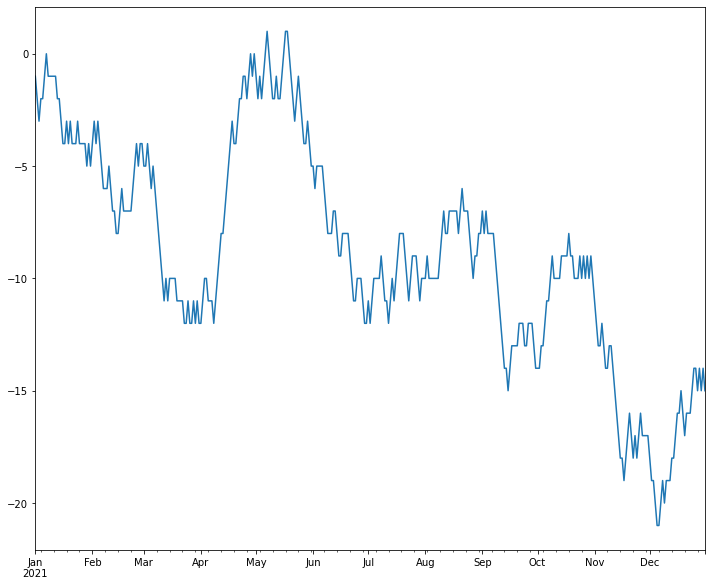

In [44]:
_ = ts.plot(figsize=(12, 10)) # ploting our data

In [45]:
# Nan half of the data
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(365)) == 1, 0, np.nan)
ts = ts + nan_mask
print(ts.isna().sum())
ts

179


2021-01-01    -1.0
2021-01-02     NaN
2021-01-03    -3.0
2021-01-04     NaN
2021-01-05    -2.0
              ... 
2021-12-27     NaN
2021-12-28     NaN
2021-12-29   -15.0
2021-12-30     NaN
2021-12-31     NaN
Freq: D, Length: 365, dtype: float64

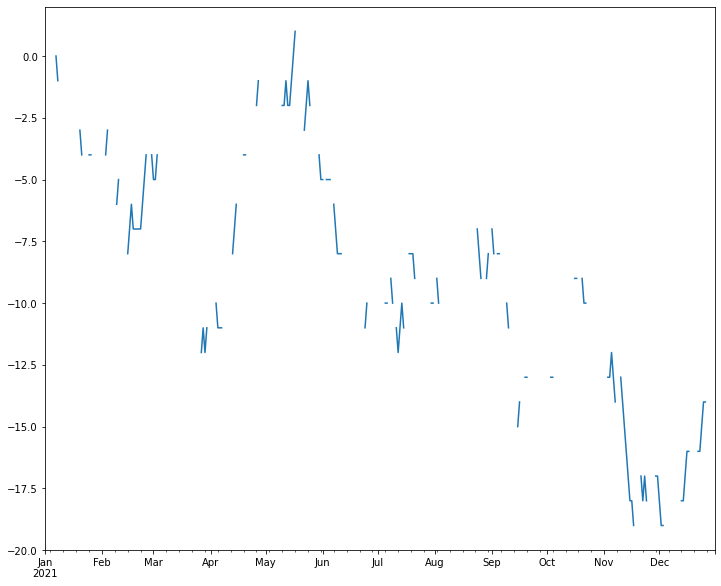

In [46]:
_ = ts.plot(figsize=(12, 10))

In [47]:
# Using interpolation
ts = ts.interpolate()
ts

2021-01-01    -1.000000
2021-01-02    -2.000000
2021-01-03    -3.000000
2021-01-04    -2.500000
2021-01-05    -2.000000
                ...    
2021-12-27   -14.333333
2021-12-28   -14.666667
2021-12-29   -15.000000
2021-12-30   -15.000000
2021-12-31   -15.000000
Freq: D, Length: 365, dtype: float64

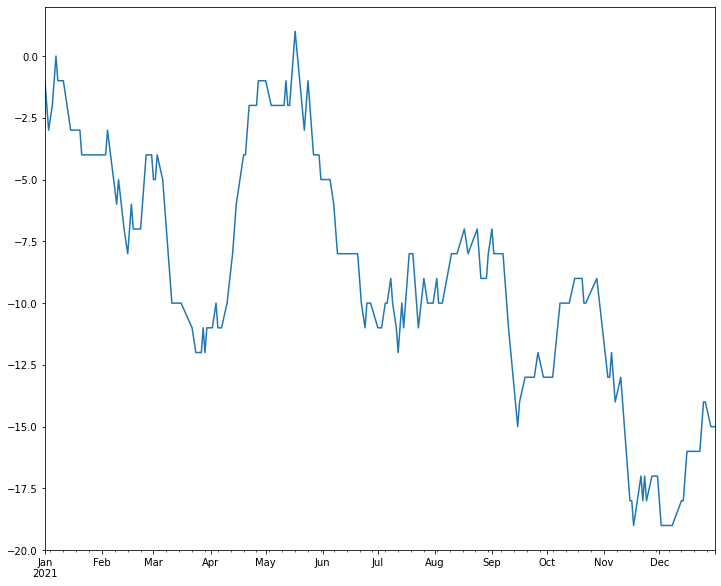

In [48]:
_ = ts.plot(figsize=(12, 10)) # plotting the graph missing values using interpolation

More strageties to manipulate data can be found in the scickit-learn library which utilizes (imputation)
The most simple commands are given by SimpleImputer ( mean,median,most_frequent,constant)

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

In [50]:
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,NaN,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,NaN,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,NaN,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,NaN,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,NaN
20638,-121.32,NaN,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [51]:
# Change the shape of the column to 1 column and as many rows as needed
cal_housing['totalBedrooms'].values.reshape(-1, 1)

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [  nan]])

We use this reshape() function to change the shape of data. The reason is because this is what scikit-learn library understands

In [52]:
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1)) # fill the na values

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [   0.]])

In [53]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", add_indicator=True) # add_indicator --> adds column
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[1.290e+02, 0.000e+00],
       [1.106e+03, 0.000e+00],
       [1.900e+02, 0.000e+00],
       ...,
       [4.850e+02, 0.000e+00],
       [4.090e+02, 0.000e+00],
       [4.350e+02, 1.000e+00]])

By using SimpleImputer we are able to create another column with values 1 or 0 depending if it has subsituted the  median

scikit-learn offers more imputers:
1) KNNImputer
2) Interative Imputer

KKNImputer : takes the data and from the neighbouring values decides which value should replace the nan

Interative imputer: subsititues the nan values depending on the other charectisitics found in the dataframe ( This is used for Machine Learning ) 

Tip:
The most important thing to remember is to subsitute the nan values with something that does makes sense and does not modify the data to a level that at somepoint will not make sense (deteriorate) 